# 海南话单文件流量分析

## 分析流程

流程步骤如下：

- 将二进制的话单文件转为可读的文本文件
- 对话单文本文件进行分析统计，生成每条话单上下行流量及发生时间的记录，以csv格式保存
- 对所有的话单记录进行统计分析，包括：

  - 话单文件的时间跨度
  - 话单文件每个时间点的话单数及上下行流量
  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cd R:/cdrlog

R:\cdrlog


In [3]:
ls *.csv *.xls

 Volume in drive R is RAMDISK
 Volume Serial Number is 5566-7788

 Directory of R:\cdrlog


 Directory of R:\cdrlog

12/25/2017  04:41 PM            35,379 allcg_volumes_history_sae05_201712171218.csv
01/02/2018  11:07 AM         1,790,257 cg33_1217_00.csv
12/25/2017  04:41 PM            16,896 PGW??????20171222102657.xls
               3 File(s)      1,842,532 bytes
               0 Dir(s)   1,621,725,184 bytes free


## Read the volumes data from CDR.

In [6]:
df1 = pd.read_csv('allcg_volumes_history_sae05_201712171218.csv', index_col='time', parse_dates=True, usecols=['host','time','value'])

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 576 entries, 2017-12-17 00:03:00 to 2017-12-18 23:33:00
Data columns (total 2 columns):
host     576 non-null object
value    576 non-null int64
dtypes: int64(1), object(1)
memory usage: 13.5+ KB


In [8]:
df1.head()

,host,value
time,,
2017-12-17 00:03:00,HKCG25BNK,278580507669
2017-12-17 00:33:00,HKCG25BNK,256541792994
2017-12-17 01:03:00,HKCG25BNK,213533160791
2017-12-17 01:33:00,HKCG25BNK,166399583500
2017-12-17 02:03:00,HKCG25BNK,135509467503


In [9]:
df1=df1.pivot(columns='host',values='value')

In [10]:
df1.info();df1.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 192 entries, 2017-12-17 00:02:00 to 2017-12-18 23:33:00
Data columns (total 6 columns):
HKCG23BNK    96 non-null float64
HKCG24BNK    96 non-null float64
HKCG25BNK    96 non-null float64
HKCG26BNK    96 non-null float64
HKCG33BNK    96 non-null float64
HKCG34BNK    96 non-null float64
dtypes: float64(6)
memory usage: 10.5 KB


host,HKCG23BNK,HKCG24BNK,HKCG25BNK,HKCG26BNK,HKCG33BNK,HKCG34BNK
time,,,,,,
2017-12-17 00:02:00,2.855504e+11,2.816000e+11,NaN,NaN,NaN,NaN
2017-12-17 00:03:00,NaN,NaN,2.785805e+11,2.828859e+11,2.801420e+11,2.865769e+11
2017-12-17 00:32:00,2.560598e+11,2.472198e+11,NaN,NaN,NaN,NaN
2017-12-17 00:33:00,NaN,NaN,2.565418e+11,2.421382e+11,2.416808e+11,2.448950e+11
2017-12-17 01:02:00,2.213185e+11,2.119734e+11,NaN,NaN,NaN,NaN


In [11]:
df1['totalVol_Gb']=df1.sum(axis=1)/1024/1024/1024;df1.head()

host,HKCG23BNK,HKCG24BNK,HKCG25BNK,HKCG26BNK,HKCG33BNK,HKCG34BNK,totalVol_Gb
time,,,,,,,
2017-12-17 00:02:00,2.855504e+11,2.816000e+11,NaN,NaN,NaN,NaN,528.199993
2017-12-17 00:03:00,NaN,NaN,2.785805e+11,2.828859e+11,2.801420e+11,2.865769e+11,1050.704457
2017-12-17 00:32:00,2.560598e+11,2.472198e+11,NaN,NaN,NaN,NaN,468.715685
2017-12-17 00:33:00,NaN,NaN,2.565418e+11,2.421382e+11,2.416808e+11,2.448950e+11,917.590887
2017-12-17 01:02:00,2.213185e+11,2.119734e+11,NaN,NaN,NaN,NaN,403.534551


In [12]:
deleted_cols=list(df1.columns);deleted_cols.remove('totalVol_Gb');deleted_cols

['HKCG23BNK', 'HKCG24BNK', 'HKCG25BNK', 'HKCG26BNK', 'HKCG33BNK', 'HKCG34BNK']

In [13]:
df1.drop(deleted_cols, axis=1, inplace=True);df1.head()

host,totalVol_Gb
time,
2017-12-17 00:02:00,528.199993
2017-12-17 00:03:00,1050.704457
2017-12-17 00:32:00,468.715685
2017-12-17 00:33:00,917.590887
2017-12-17 01:02:00,403.534551


In [14]:
df1.sum()

host
totalVol_Gb    110153.821518
dtype: float64

In [15]:
df1=df1.resample('1h').sum();df1.head()

host,totalVol_Gb
time,
2017-12-17 00:00:00,2965.211022
2017-12-17 01:00:00,2149.139612
2017-12-17 02:00:00,1390.041564
2017-12-17 03:00:00,1080.595327
2017-12-17 04:00:00,641.750674


In [16]:
df1.sum()

host
totalVol_Gb    110153.821518
dtype: float64

## Read the volume data from OSS

In [112]:
df2=pd.read_excel('sae05_volumes_sgi.xls',skiprows=2, parse_cols="C:E",parse_dates=True, index_col='time')

In [113]:
df2.info();df2.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2017-12-14 00:00:00 to 2017-12-14 14:00:00
Data columns (total 2 columns):
VolSgiDL    15 non-null float64
VolSgiUp    15 non-null float64
dtypes: float64(2)
memory usage: 360.0 bytes


,VolSgiDL,VolSgiUp
time,,
2017-12-14 00:00:00,1816449.66,179974.08
2017-12-14 01:00:00,1159595.31,111337.89
2017-12-14 02:00:00,794472.43,74886.97
2017-12-14 03:00:00,91849.17,9275.28
2017-12-14 04:00:00,86962.57,7091.42


In [114]:
df2['vol_Gb']=df2.sum(axis=1)/1024;df2.head()

,VolSgiDL,VolSgiUp,vol_Gb
time,,,
2017-12-14 00:00:00,1816449.66,179974.08,1949.632559
2017-12-14 01:00:00,1159595.31,111337.89,1241.145703
2017-12-14 02:00:00,794472.43,74886.97,848.983789
2017-12-14 03:00:00,91849.17,9275.28,98.754346
2017-12-14 04:00:00,86962.57,7091.42,91.849600


In [115]:
df2.drop(['VolSgiDL','VolSgiUp'],axis=1,inplace=True);df2

,vol_Gb
time,
2017-12-14 00:00:00,1949.632559
2017-12-14 01:00:00,1241.145703
2017-12-14 02:00:00,848.983789
2017-12-14 03:00:00,98.754346
2017-12-14 04:00:00,91.849600
2017-12-14 05:00:00,121.269658
2017-12-14 06:00:00,310.524199
2017-12-14 07:00:00,628.396758
2017-12-14 08:00:00,907.737012


## comparation

In [116]:
df=pd.concat([df1,df2],axis=1); df.columns=['CDR','SGi'];df

,CDR,SGi
time,,
2017-12-14 00:00:00,2773.998249,1949.632559
2017-12-14 01:00:00,1892.525623,1241.145703
2017-12-14 02:00:00,972.109761,848.983789
2017-12-14 03:00:00,954.198961,98.754346
2017-12-14 04:00:00,81.174541,91.849600
2017-12-14 05:00:00,111.786369,121.269658
2017-12-14 06:00:00,171.335686,310.524199
2017-12-14 07:00:00,444.728231,628.396758
2017-12-14 08:00:00,816.237245,907.737012


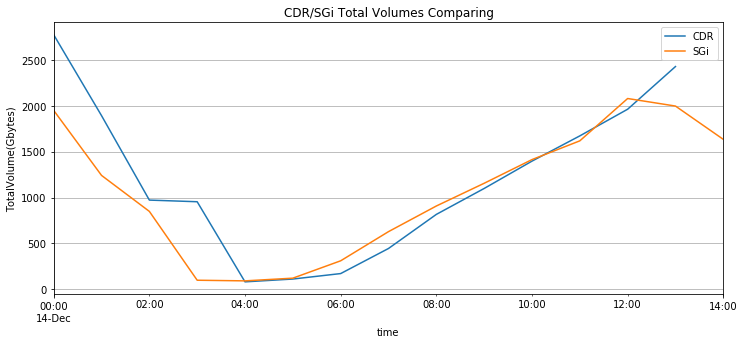

In [120]:
ax=df.plot(figsize=(12,5),title="CDR/SGi Total Volumes Comparing",grid=True)
ax.set(ylabel="TotalVolume(Gbytes)")